**Step 1: Set Up the Environment**

Import essential modules in Python

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

**Step 2: Load and Preprocess Data**

For MNIST (ANN):

In [16]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0  # Normalize
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, 10)

For CIFAR-10 (CNN):

In [17]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0  # Normalize
y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, 10)

**Step 3: Build and Train the ANN**

Create an ANN model

In [19]:
from tensorflow.keras.layers import Input

ann_model = Sequential([
    Input(shape=(28, 28)),  # Explicitly define the input shape
    Flatten(),              # Flatten the 2D images
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


Compile and train the model

In [20]:
# Compile and Train ANN
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history_ann = ann_model.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=32, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8509 - loss: 0.4919 - val_accuracy: 0.9569 - val_loss: 0.1364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9571 - loss: 0.1413 - val_accuracy: 0.9694 - val_loss: 0.0991
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9685 - loss: 0.1037 - val_accuracy: 0.9722 - val_loss: 0.0945
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9725 - loss: 0.0867 - val_accuracy: 0.9745 - val_loss: 0.0830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9775 - loss: 0.0694 - val_accuracy: 0.9765 - val_loss: 0.0821
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9790 - loss: 0.0656 - val_accuracy: 0.9782 - val_loss: 0.0710
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0580 - val_accuracy: 0.9772 - val_loss: 0.0829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.0500

**Step 4: Build and Train the CNN**

Create an CNN model

In [22]:
cnn_model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compile and train the model

In [23]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history_cnn = cnn_model.fit(x_train_cifar, y_train_cifar, epochs=10, batch_size=32, validation_data=(x_test_cifar, y_test_cifar))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3117 - loss: 1.8625 - val_accuracy: 0.5337 - val_loss: 1.3082
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.5092 - loss: 1.3618 - val_accuracy: 0.6036 - val_loss: 1.1314
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5690 - loss: 1.2104 - val_accuracy: 0.6330 - val_loss: 1.0612
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6033 - loss: 1.1249 - val_accuracy: 0.6638 - val_loss: 0.9747
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6247 - loss: 1.0603 - val_accuracy: 0.6517 - val_loss: 0.9924
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6430 - loss: 1.0213 - val_accuracy: 0.6620 - val_loss: 0.9743
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6593 - loss: 0.9718 - val_accuracy: 0.6798 - val_loss: 0.9259
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6677 -

**Step 5: Evaluate Models**

In [24]:
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_mnist, y_test_mnist, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cifar, y_test_cifar, verbose=0)

In [25]:
print(f"ANN Test Accuracy on MNIST: {ann_test_acc:.2f}")
print(f"CNN Test Accuracy on CIFAR-10: {cnn_test_acc:.2f}")

ANN Test Accuracy on MNIST: 0.98
CNN Test Accuracy on CIFAR-10: 0.69


**Step 6: Visualize Training History**

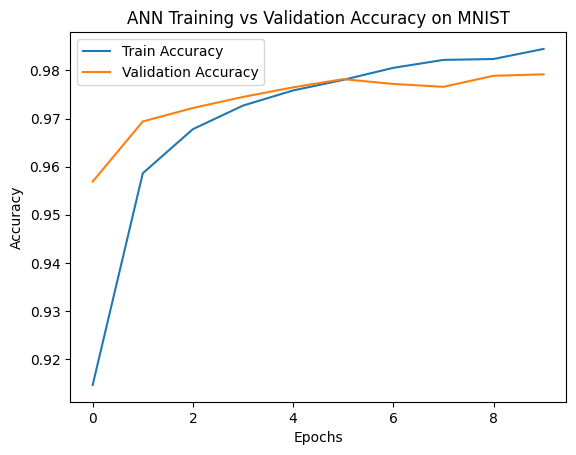

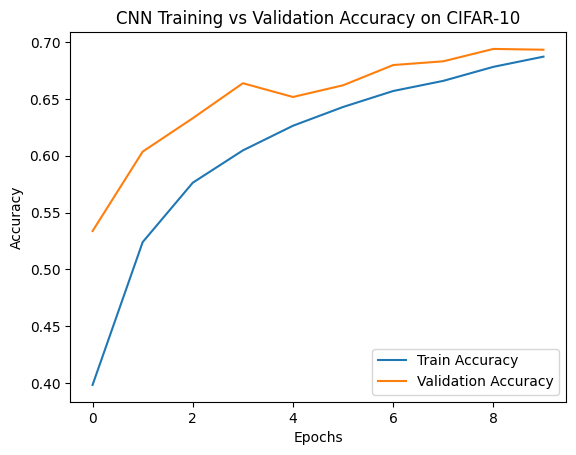

In [26]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_ann, "ANN Training vs Validation Accuracy on MNIST")
plot_history(history_cnn, "CNN Training vs Validation Accuracy on CIFAR-10")